Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 



Data Dictionary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[20,15]

In [2]:
train =pd.read_csv('train_v9rqX0R.csv')
test= pd.read_csv('test_AbJTz2l.csv')

In [3]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# univariate bivariate analysis
# missing values
#outliers
#feature engg
#model building


# Base Model

In [6]:
submission = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':train.Item_Outlet_Sales.mean()})
submission.to_csv('basemodel.csv',index=False)

In [7]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
combined = pd.concat([train,test],ignore_index=True)

In [9]:
combined.shape

(14204, 12)

In [10]:
cat_cols= combined.select_dtypes('object')
cat_cols=['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


num_cols=combined.select_dtypes(include=np.number)
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Item_Outlet_Sales']

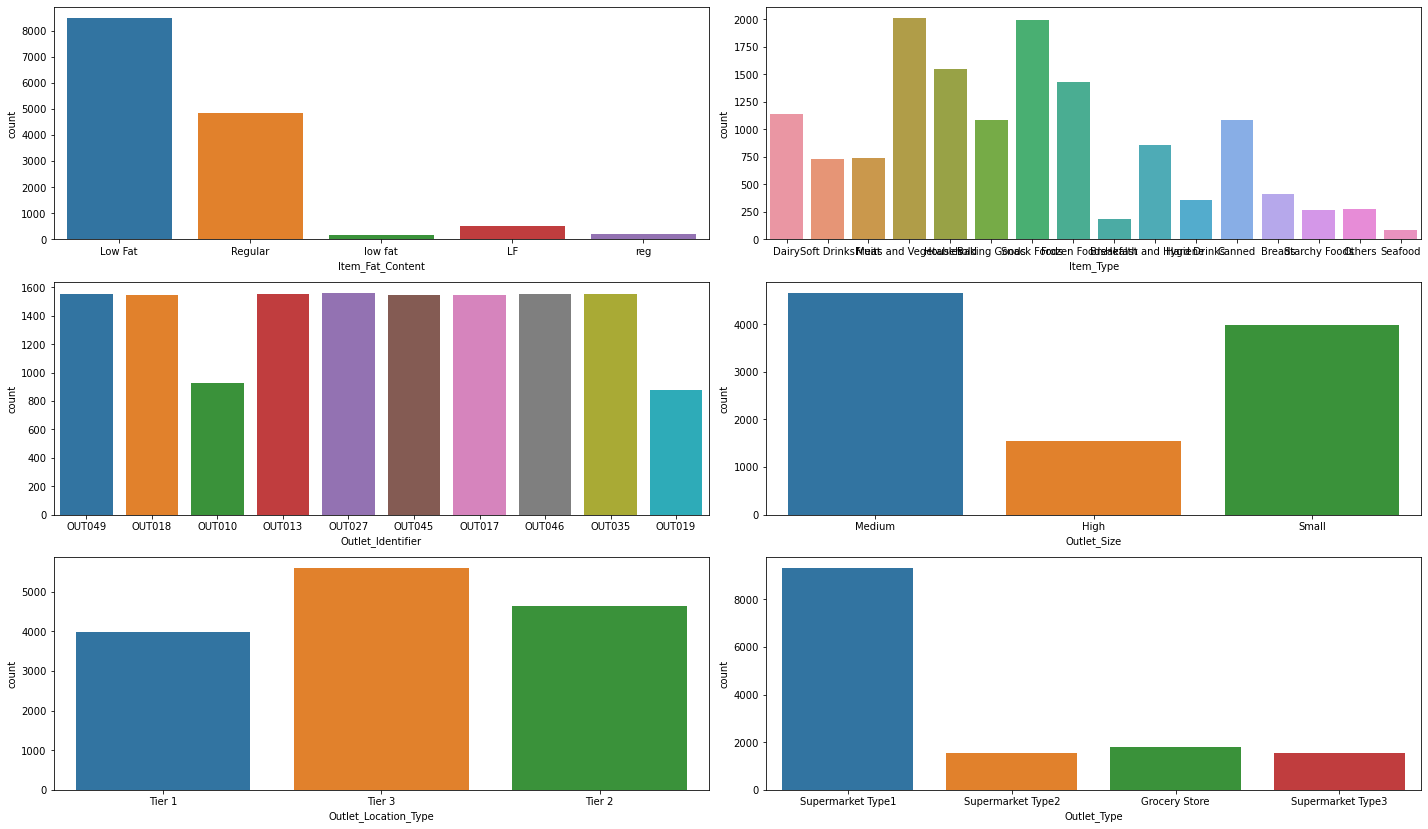

In [11]:

a=1
for i in cat_cols:
    plt.subplot(4,2,a)
    sns.countplot(combined[i])
    a+=1
plt.tight_layout()




#Most of outlets are medium in size
#most of outlet are tier 3 outlet
#the item types are only 2 in data: Low fat and Regular
#and outlet are mostly S1 type

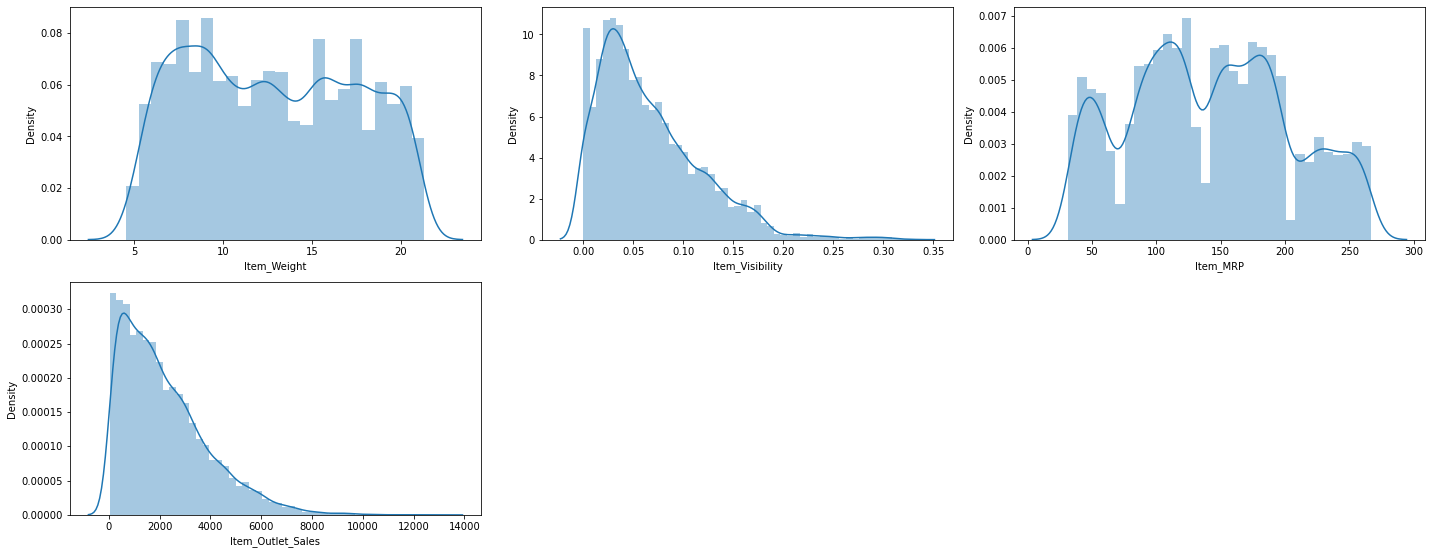

In [12]:

a=1
for i in num_cols:
    plt.subplot(4,3,a)
    sns.distplot(combined[i])
    a+=1
plt.tight_layout()



## Item weitgh has no pattern of skewness it is uniformly distributed
#item visibility is positivly skewd
# item MRP is has 4 modes
# sales is skewed


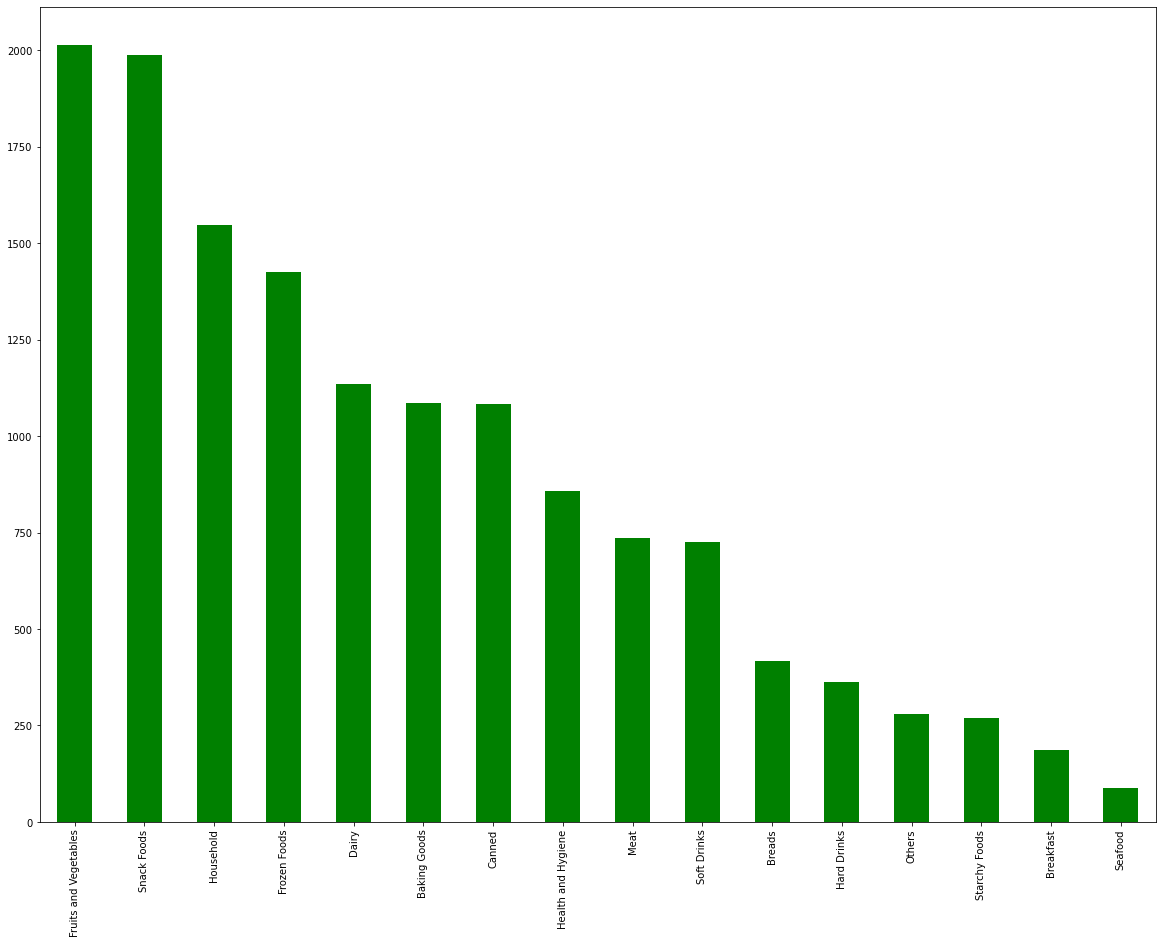

In [13]:
combined.Item_Type.value_counts().plot(kind='bar',color='Green')
plt.show()                                             ### Top 5 selling items are fruits and veg,snacks,household,dairy,frozen

In [14]:
#outlet 

combined.Outlet_Identifier.value_counts()


#outlet 27 is the highly visible outlet in business

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Summary

Most Spread Out outlets in business is "outlet27"

Most of the outlets are in tier 3

Top 5 sellin items are Fruits,Vegetable,Diary,Snacks,Frozen and HouseHold

Generally outlets are S1 Type in nature

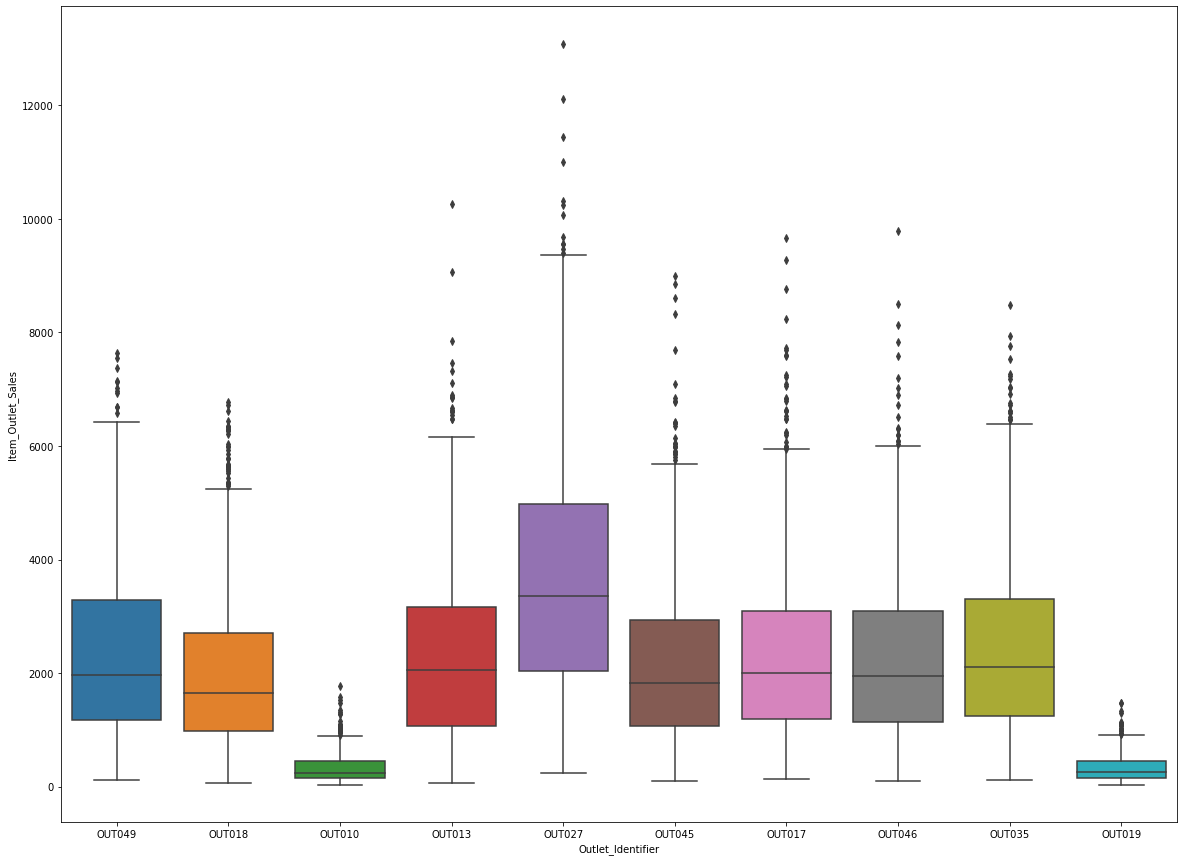

In [15]:
sns.boxplot(train['Outlet_Identifier'],train['Item_Outlet_Sales'])
plt.show()

In [16]:
#fix item fat content

combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
#replace
combined.Item_Fat_Content.replace(to_replace=['low Fat', 'LF', 'reg','low fat'],
                                  value=['Low Fat','Low Fat','Regular','Low Fat'],inplace=True)

In [18]:
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

# Bivariate Analysis

In [19]:
#num vs Num(target var)
#Cat Vs Num(target var)
#

In [20]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


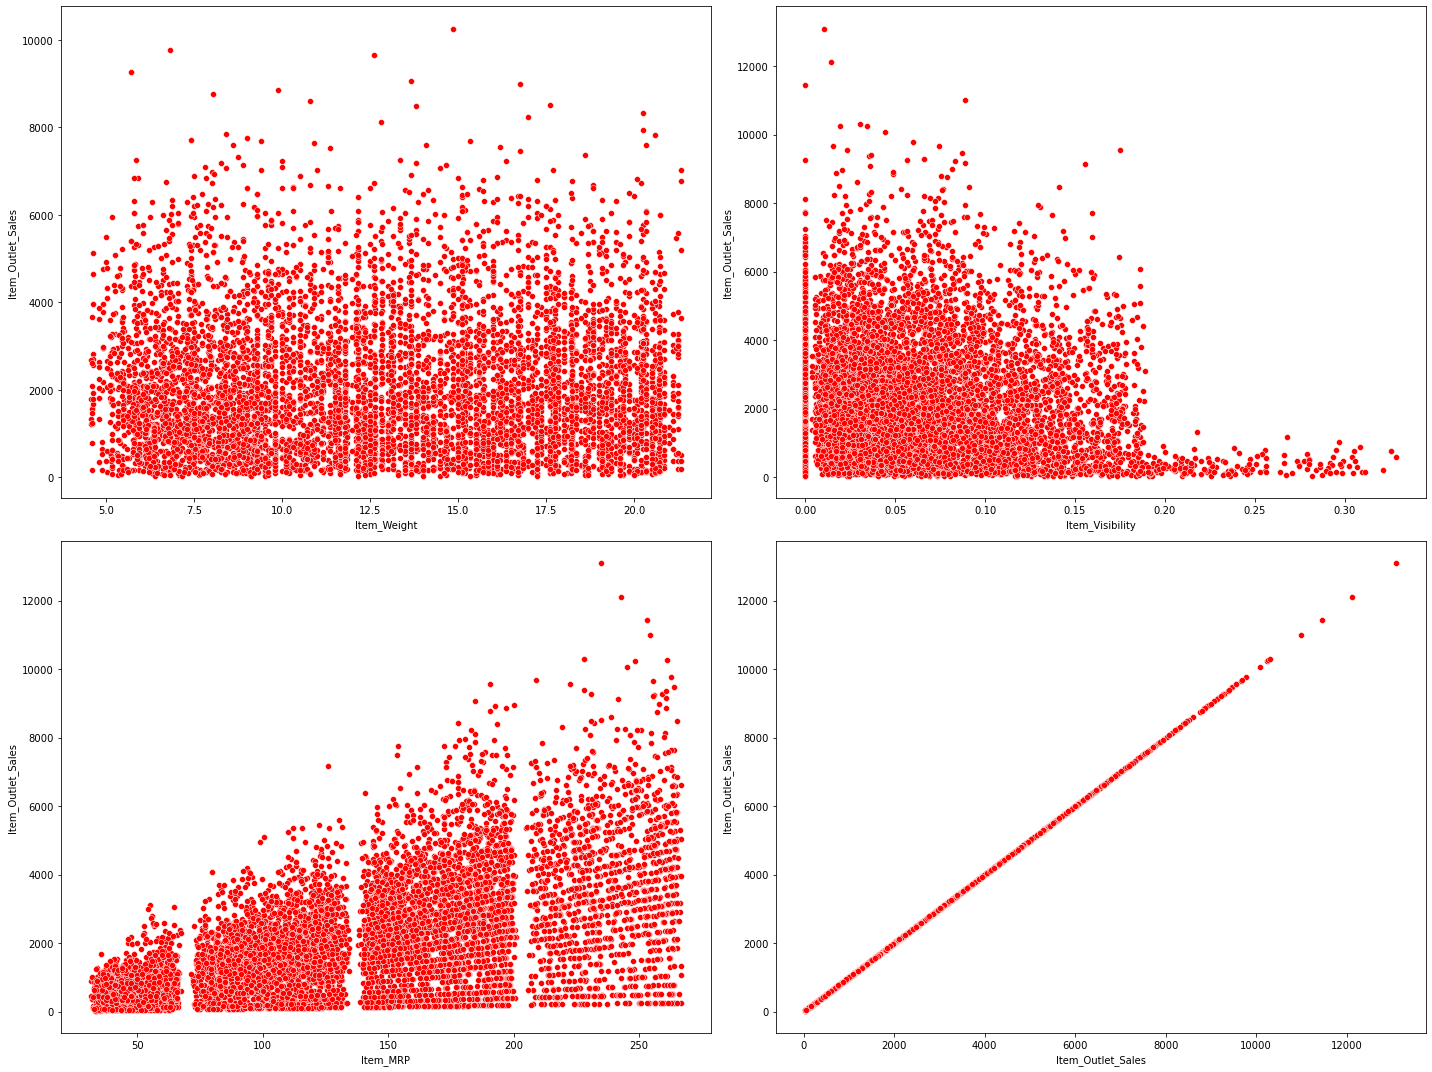

In [21]:
a=1
for i in num_cols:
    plt.subplot(2,2,a)
    sns.scatterplot(combined[i],combined['Item_Outlet_Sales'],color='red')
    a+=1
plt.tight_layout()


# item visibilty has lot of zeros that need fixing
# item visibility increases,sales decreases
# item weight has no relation wiht sales since it is uniform in nature
# Item MRP since it was multimodal data we can see there are 4 cluster of sales emerging
# Due to combination defect the clusters are developed

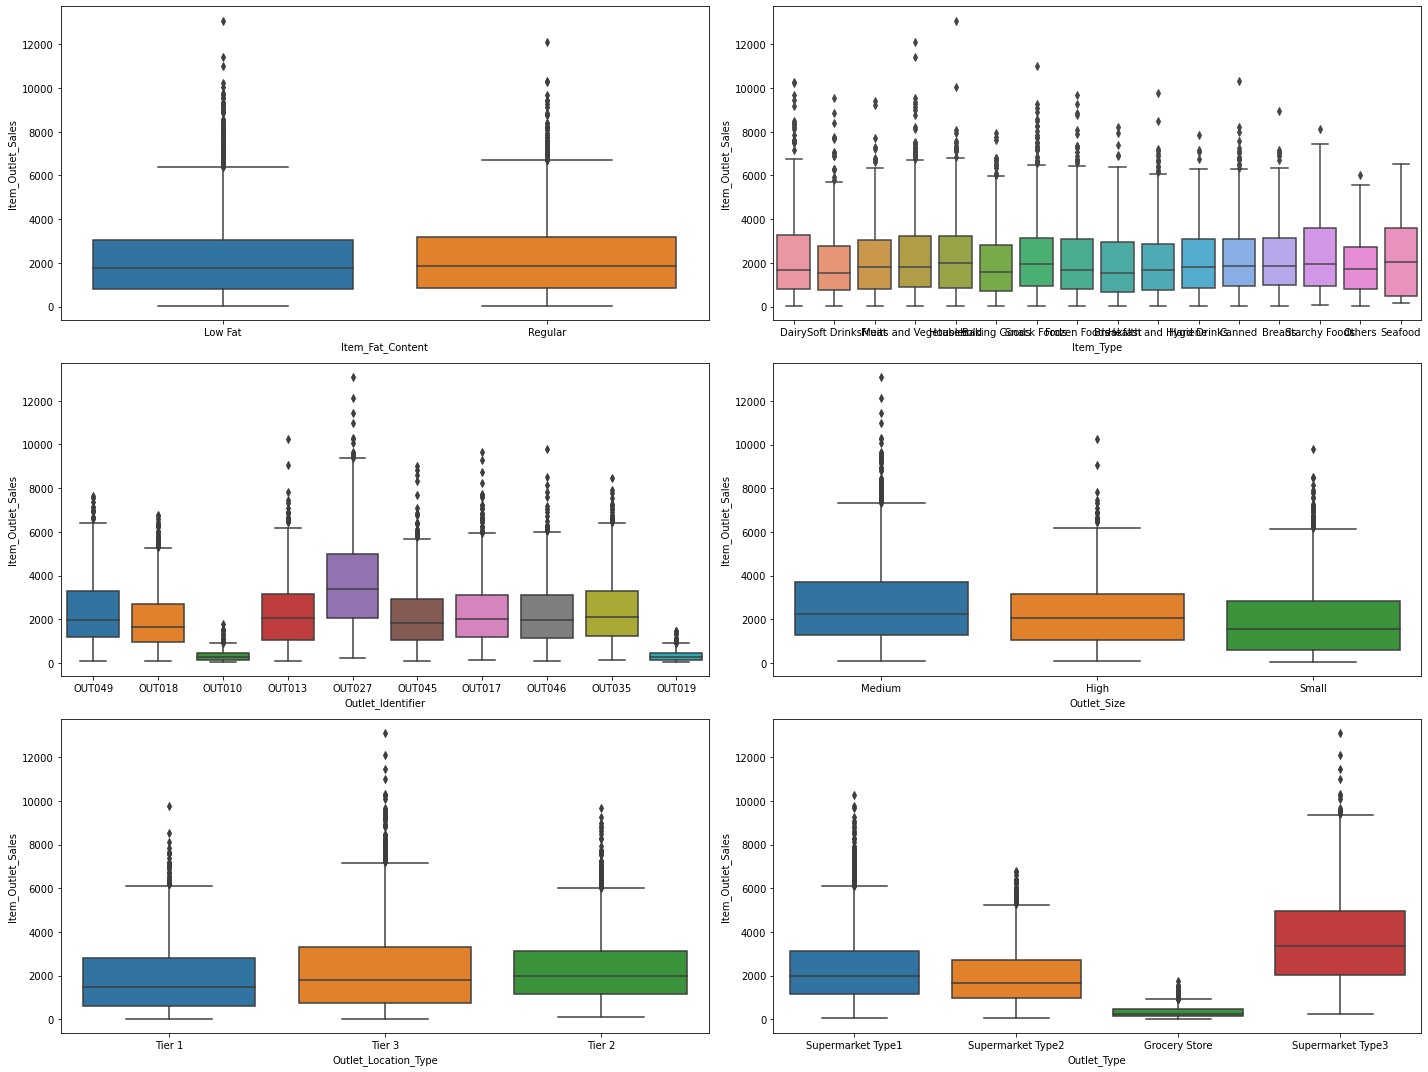

In [22]:
a=1
for i in cat_cols:
    plt.subplot(3,2,a)
    sns.boxplot(combined[i],combined['Item_Outlet_Sales'])
    a+=1
plt.tight_layout()


# Low fat content having highest sales
# tier 3 Cities followed by S3 are having highest sales
# Most revenue Generating outlets are outlet027 and outlet013
# the worst performing outlet are Outlet019 Outlet010

# Missing Values

In [23]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [24]:
#Item weight

combined.loc[combined.Item_Weight.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [25]:
#combined.groupby('Item_Identifier')['Item_Weight'].apply x:x.fillna(x.mean())

In [26]:
mapping= combined.groupby('Item_Identifier')['Item_Weight'].mean().to_dict()
combined['Item_Weight']=combined.Item_Identifier.map(mapping)

In [27]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
combined['Item_Visibility']=combined.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x: x.replace(to_replace=0, value=x.mean()))

In [29]:
# Outlet size

combined['Outlet_Size'].isnull().sum()

4016

In [30]:
pd.DataFrame(combined.groupby('Outlet_Type')['Outlet_Size'].value_counts())

Outlet_Size
Outlet_Type       Outlet_Size             
Grocery Store     Small                880
Supermarket Type1 Small               3100
                  High                1553
                  Medium              1550
Supermarket Type2 Medium              1546
Supermarket Type3 Medium              1559

In [31]:
combined.loc[(combined.Outlet_Type=='Grocery Store')&(combined.Outlet_Size.isnull()),'Outlet_Size']='Small'

In [32]:
combined.loc[(combined.Outlet_Type=='Supermarket Type1')&(combined.Outlet_Size.isnull()),'Outlet_Size']='Small'

In [33]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

# Feature Eng

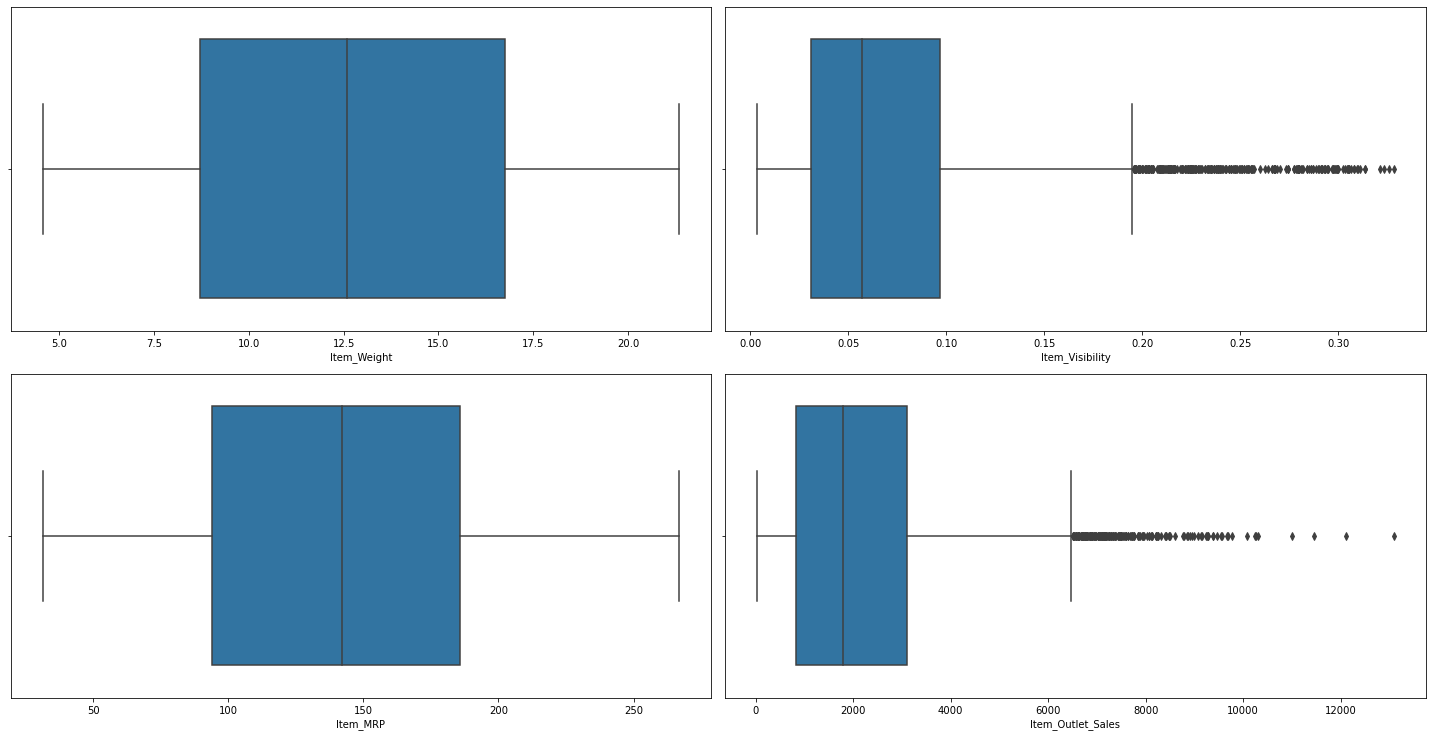

In [34]:
a=1
for i in num_cols:
    plt.subplot(3,2,a)
    sns.boxplot(combined[i])
    a+=1
plt.tight_layout()


In [35]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])


combined['Item_ids']=pd.Series(ids)

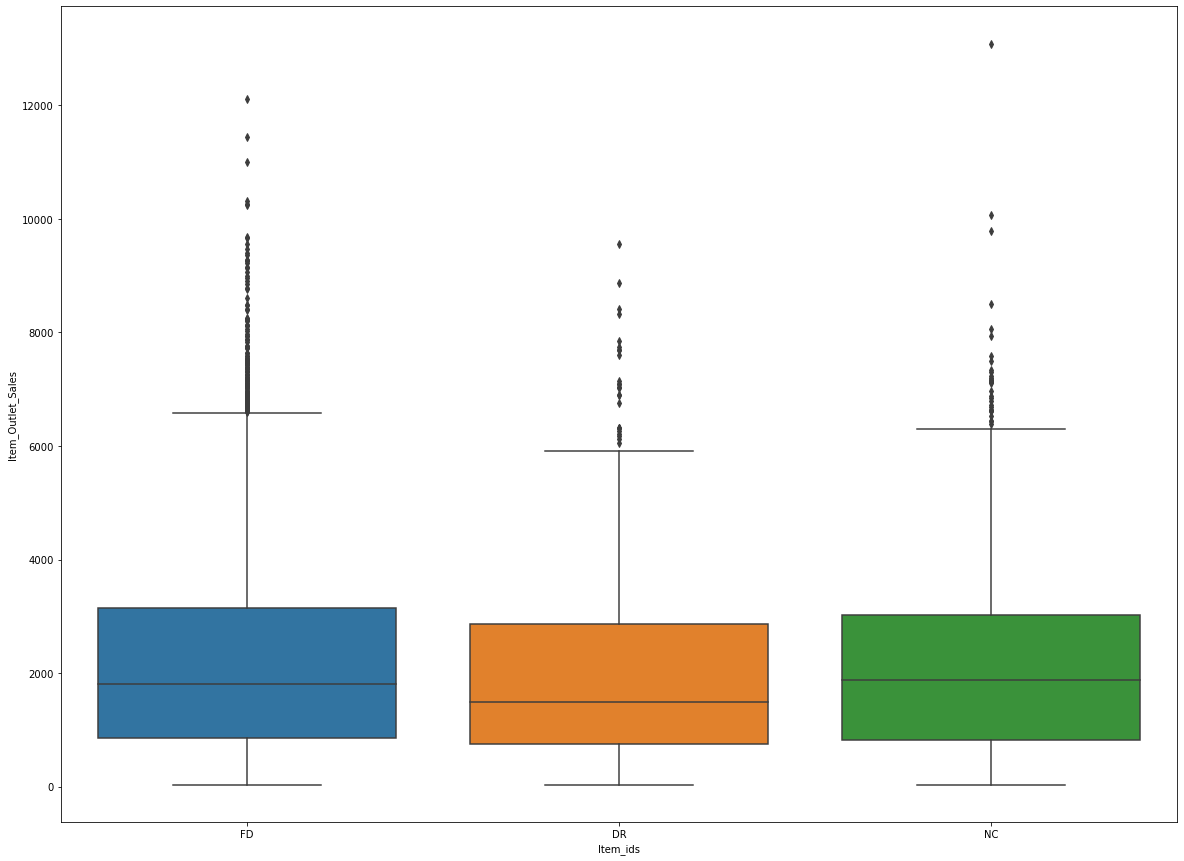

In [37]:
sns.boxplot(combined.Item_ids,combined.Item_Outlet_Sales)
plt.show()

In [38]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [39]:
perishable=['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads', 'Starchy Foods', 'Seafood']

def perish(x):
    if x in perishable:
        return('Perishables')
    else:
        return('Non Perishables')

combined['Item_Type_cat']=combined['Item_Type'].apply(perish)

In [40]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [41]:
pd.crosstab(combined['Item_ids'],combined['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Regular
Item_ids,,
DR,1208,109
FD,5291,4910
NC,2686,0


In [42]:
#Apply non edible in item fat content for nc

combined.loc[combined.Item_ids=='NC', 'Item_Fat_Content']='Non_Edible'


In [43]:
pd.crosstab(combined['Item_ids'],combined['Item_Fat_Content'])

Item_Fat_Content,Low Fat,Non_Edible,Regular
Item_ids,,,
DR,1208,0,109
FD,5291,0,4910
NC,0,2686,0


In [44]:
#Vintage for outlet

combined['Vintage']= 2013 - combined.Outlet_Establishment_Year

In [45]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ids,Item_Type_cat,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishables,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishables,26


In [46]:
#price

combined['Price_per_unit']=combined.Item_MRP/combined.Item_Weight

In [47]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ids,Item_Type_cat,Vintage,Price_per_unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishables,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishables,26,6.031512


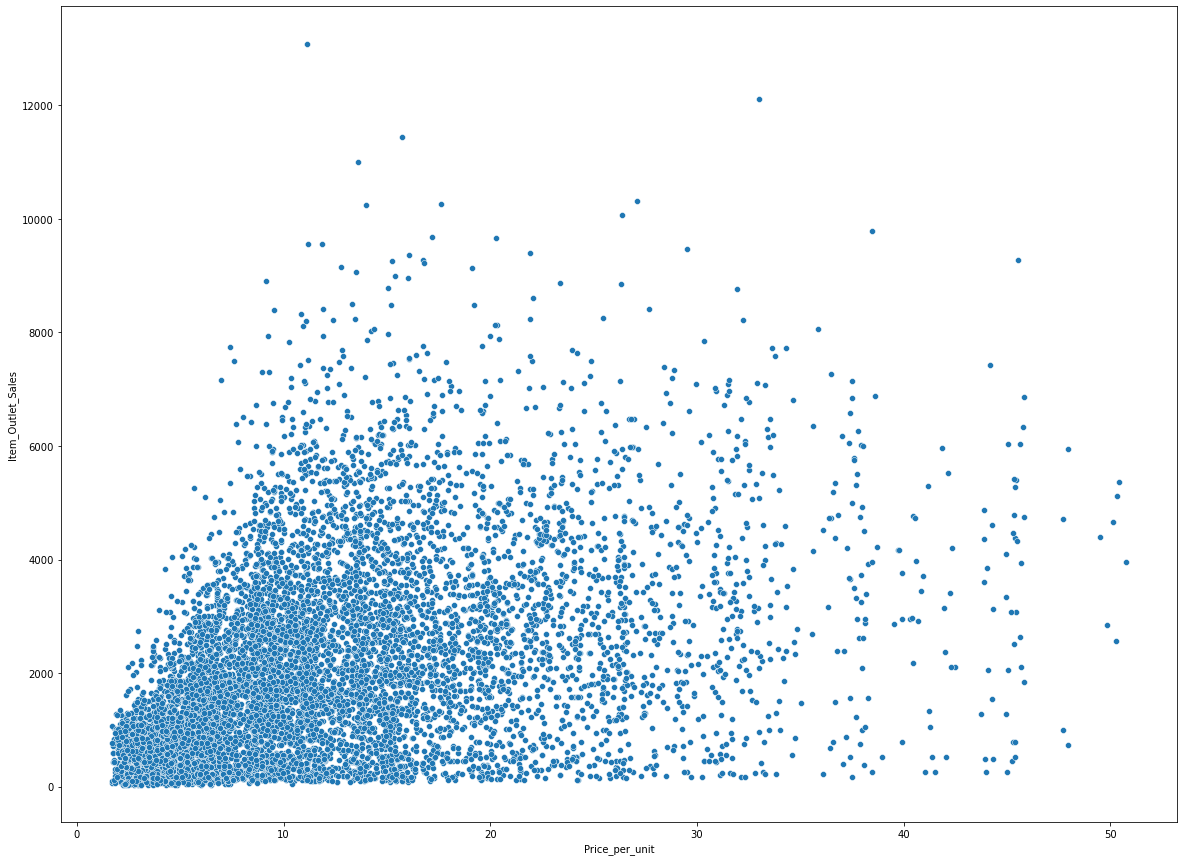

In [48]:
sns.scatterplot(combined['Price_per_unit'],combined['Item_Outlet_Sales'])
plt.show()

In [49]:
#sales Summary basis Outlets

outlet_sales = combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().to_dict()

In [50]:
combined['Outlet_Identifier']=combined.Outlet_Identifier.map(outlet_sales)

In [51]:
newdata=combined.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1)

In [52]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ids,Item_Type_cat,Vintage,Price_per_unit
0,9.30,Low Fat,0.016047,249.8092,2348.354635,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,5.92,Regular,0.019278,48.2692,1995.498739,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non Perishables,4,8.153581
2,17.50,Low Fat,0.016760,141.6180,2348.354635,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,19.20,Regular,0.017834,182.0950,339.351662,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,8.93,Non_Edible,0.009780,53.8614,2298.995256,High,Tier 3,Supermarket Type1,994.7052,NC,Non Perishables,26,6.031512


In [53]:
cols= newdata.select_dtypes(include=np.number).columns

In [54]:
newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]


newtest.drop('Item_Outlet_Sales',axis=1,inplace =True)

print(newtrain.shape,newtest.shape)

(8523, 13) (5681, 12)


In [55]:
newtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_ids', 'Item_Type_cat',
       'Vintage', 'Price_per_unit'],
      dtype='object')

In [56]:
import scipy.stats as stats

for i in cols:
    ttest,pvalue=stats.ttest_ind(newtrain.loc[:,i,],newtrain.Item_Outlet_Sales)
    print(i,":",pvalue)

Item_Weight : 0.0
Item_Visibility : 0.0
Item_MRP : 0.0
Outlet_Identifier : 0.9999999999999823
Item_Outlet_Sales : 1.0
Vintage : 0.0
Price_per_unit : 0.0


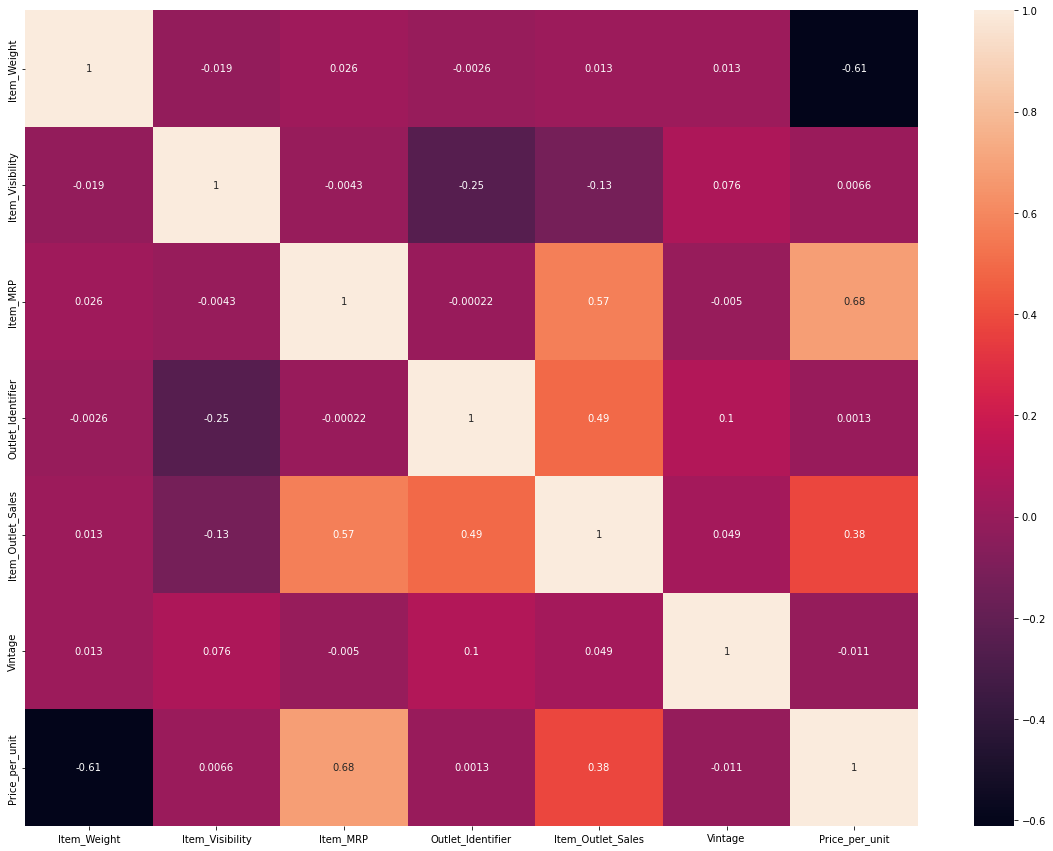

In [57]:
sns.heatmap(newtrain.corr(),annot=True)
plt.show()

# Outlier 

In [58]:
q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)

iqr= q3-q1

ul=q3+1.5*iqr
ll=q1-1.5*iqr

#wt_outlier= newtrain[~((newtrain<ll)|(newtrain>ul)).any(axis=1)]

In [59]:
newtrain.Outlet_Size.value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [60]:
newtrain['Outlet_Size']=newtrain['Outlet_Size'].map({'Small': 3,'Medium':2,'High':1})

In [61]:
newtrain.Outlet_Size.value_counts()

3    4798
2    2793
1     932
Name: Outlet_Size, dtype: int64

In [62]:
train_encoded = pd.get_dummies(newtrain,drop_first=True)
#wt_encoded = pd.get_dummies(wt_outlier,drop_first=True)

print(train_encoded.shape)

(8523, 18)


In [63]:
newtest['Outlet_Size']=newtest['Outlet_Size'].map({'Small': 3,'Medium':2,'High':1})
newtest_endcoded = pd.get_dummies(newtest,drop_first=True)
print(newtest_endcoded.shape)

(5681, 17)


# Model Building

In [64]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

lr=LinearRegression()
kfold = KFold(n_splits=5,shuffle=True,random_state=0)

pred=[]
x= train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest_endcoded))
    
#prediction file
finalpred= np.abs(pd.DataFrame(pred).T.mean(axis=1))

In [65]:


submission = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':finalpred})
submission.to_csv('LRMODEL.csv',index=False)

In [66]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=0)

pred=[]
x= train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest_endcoded))
    
#prediction file
finalpred= np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':finalpred})
submission.to_csv('RF.csv',index=False)

In [67]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor


gr=GradientBoostingRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=0)

pred=[]
x= train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(gr.fit(xtrain,ytrain).predict(newtest_endcoded))
    
#prediction file
finalpred= np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':finalpred})
submission.to_csv('gr.csv',index=False)

In [ ]:
# Grid Search on Gradient Boosting Model


from sklearn.model_selection import GridSearchCV

params = [{'loss':['squared_error','absolute_error','huber','quantile'],
          'n_estimators':[100,200,500,1000],
          'criterion':['friedman_mse','squared_error','mse'],
          'min_samples_split':[2,4,6,8]}]

grid =  GridSearchCV(estimator= gr,param_grid=params,cv=3)

grid.fit(x,y)
grid.best_params_

In [69]:
from xgboost import XGBRegressor


xg=XGBRegressor()
kfold = KFold(n_splits=5,shuffle=True,random_state=0)

pred=[]
x= train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(xg.fit(xtrain,ytrain).predict(newtest_endcoded))
    
#prediction file
finalpred= np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                          'Outlet_Identifier':test.Outlet_Identifier,
                          'Item_Outlet_Sales':finalpred})
submission.to_csv('xg.csv',index=False)

In [70]:
cd

C:\Users\Mayuri


# Stacking Model

In [73]:


from sklearn.ensemble import StackingRegressor

basemodels=[('lr',LinearRegression()),('xgb',XGBRegressor()),('Rf',RandomForestRegressor())]
stack=StackingRegressor(estimators=basemodels,final_estimator=rf,cv=5)

kfold=KFold(n_splits=5,shuffle=True,random_state=0)

pred=[]

x=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded['Item_Outlet_Sales']

for train_index,test_index in kfold.split(x,y):
    xtrain=x.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(newtest_endcoded))
    
final_pred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission=pd.DataFrame({'Item_Identifier':test['Item_Identifier'],
                        'Outlet_Identifier':test['Outlet_Identifier'],
                        'Item_Outlet_Sales':final_pred})

submission.to_csv('stackmodelmart.csv',index=False)

In [74]:
cd

C:\Users\Mayuri
